In [1]:
import glob

import numpy as np

record_files = glob.glob("policy_records/step_*.npy")
num_steps = len(record_files)

records = []
for i in range(num_steps):
    record = np.load(f"policy_records/step_{i}.npz.npy", allow_pickle=True).item()
    records.append(record)

Show record images

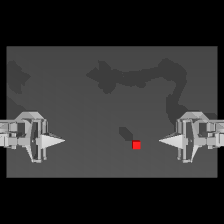

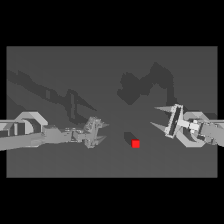

In [2]:
from PIL import Image


def get_image(step, idx=0):
    img = (255 * records[step]["inputs/image"]).astype(np.uint8)
    return img[idx].transpose(1, 2, 0)


def show_image(step, idx=0):
    return Image.fromarray(get_image(step, idx))


display(show_image(0))
display(show_image(num_steps // 2))


In [3]:
import pandas as pd


def get_axis(name, axis):
    return np.array([record[name][axis] for record in records])


# qpos is [..., 14] of type float:
# 0-5: left arm joint angles
# 6: left arm gripper
# 7-12: right arm joint angles
# 13: right arm gripper
names = [("left_joint", 6), ("left_gripper", 1), ("right_joint", 6), ("right_gripper", 1)]


def make_data():
    cur_dim = 0
    in_data = {}
    out_data = {}
    for name, dim_size in names:
        for i in range(dim_size):
            in_data[f"{name}_{i}"] = get_axis("inputs/qpos", cur_dim)
            out_data[f"{name}_{i}"] = get_axis("outputs/qpos", cur_dim)
            cur_dim += 1
    return pd.DataFrame(in_data), pd.DataFrame(out_data)


in_data, out_data = make_data()


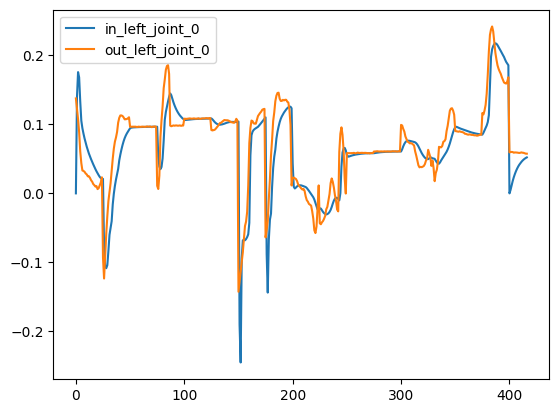

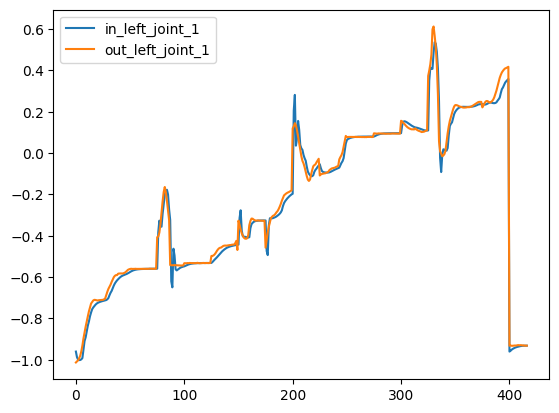

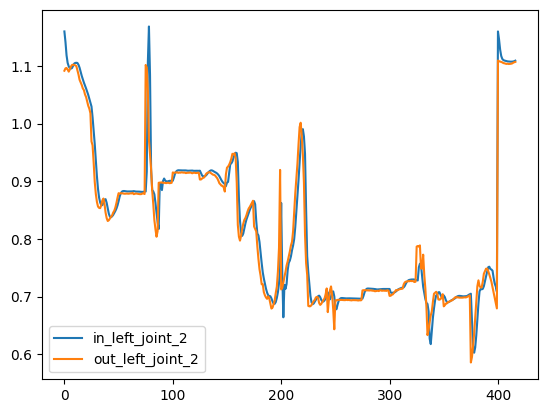

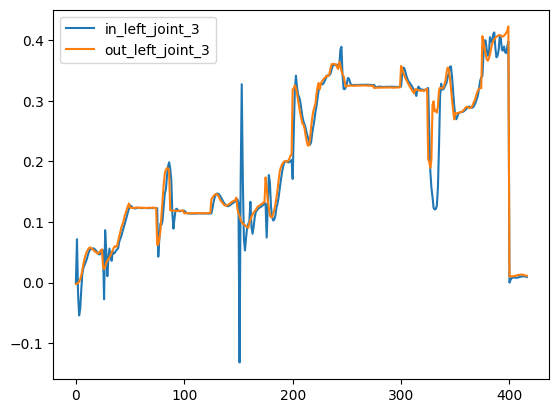

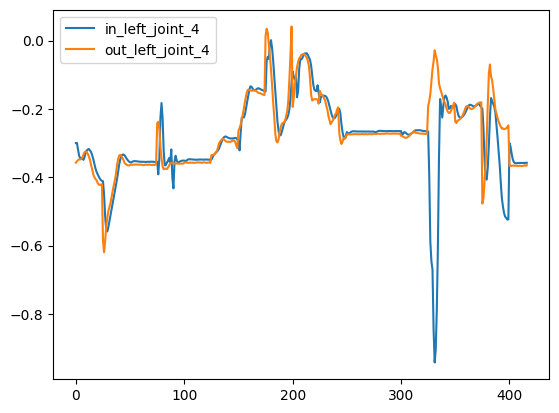

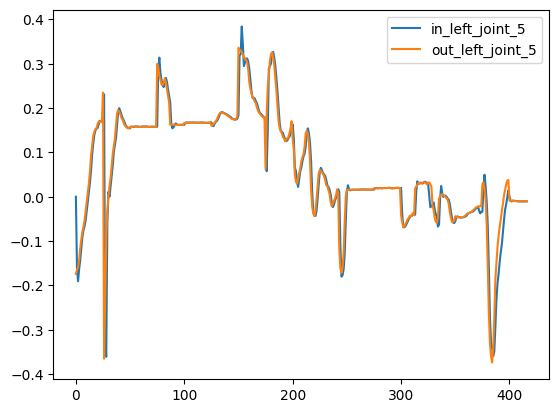

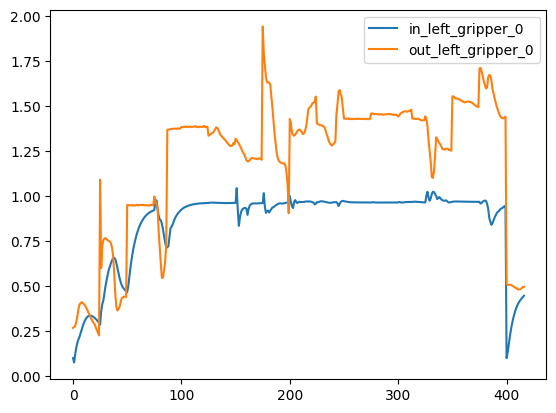

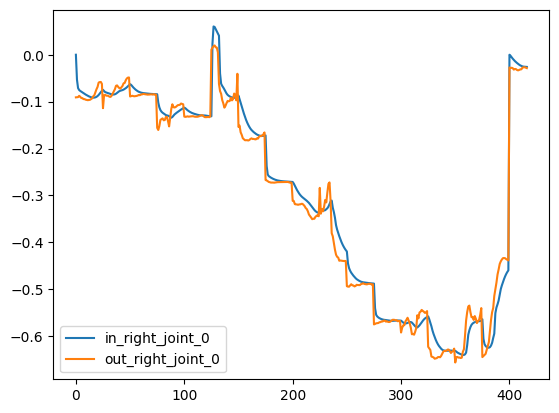

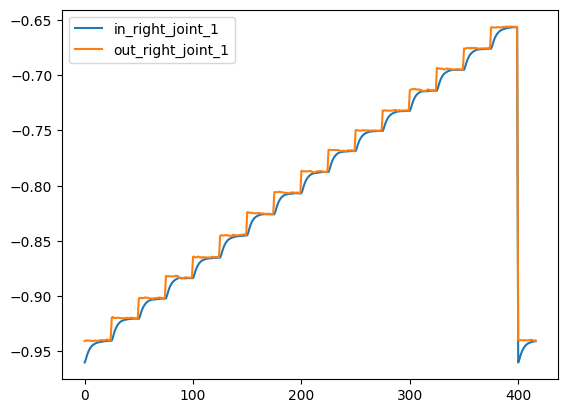

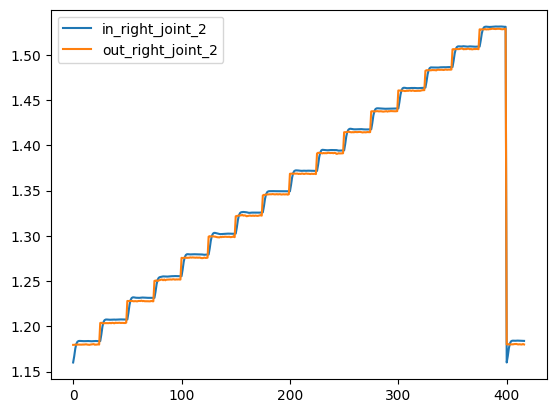

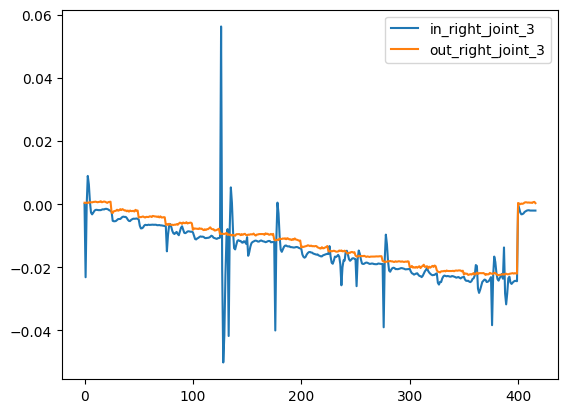

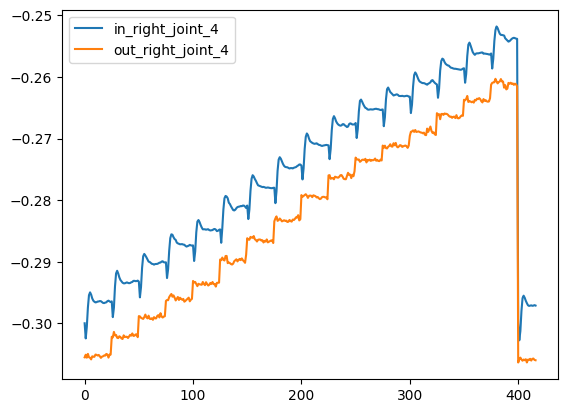

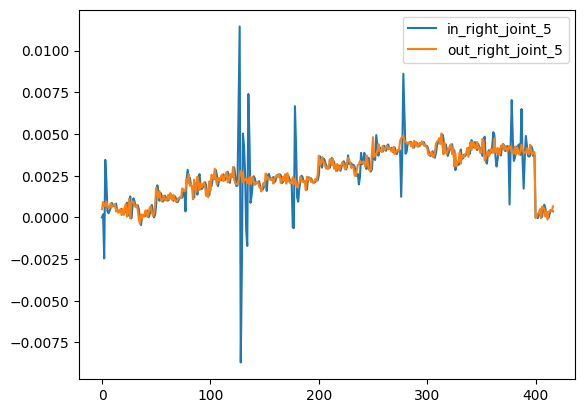

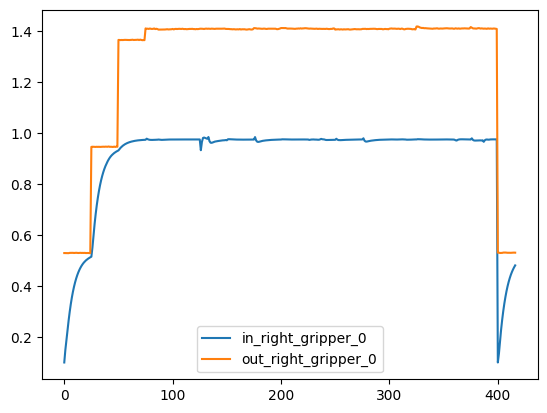

In [4]:
for name in in_data.columns:
    data = pd.DataFrame(
        {
            f"in_{name}": in_data[name],
            f"out_{name}": out_data[name],
        }
    )
    data.plot()